In [142]:
from utils.util import clean_column_names
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.util import *
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [73]:
org = pd.read_csv('electric_train.csv')
df = org.copy()
df.head()

,electric_train.num,electric_train.tm,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec
0,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
1,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
2,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
3,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
4,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73


In [74]:
df = clean_column_names(df)
df['날짜'] = pd.to_datetime(df['날짜'])

df

,격자넘버,날짜,시간,공동주택수,지점번호,계약전력합계,전력수요_합계,전력부하량_평균,기온,상대습도,풍속,강수량,체감온도,요일,주중_주말,전력기상지수
0,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
1,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
2,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
3,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
4,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593350,20947,2022-12-31 20:00:00,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593351,20947,2022-12-31 21:00:00,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593352,20947,2022-12-31 22:00:00,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593353,20947,2022-12-31 23:00:00,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [75]:
df.set_index('날짜').sort_index()

,격자넘버,시간,공동주택수,지점번호,계약전력합계,전력수요_합계,전력부하량_평균,기온,상대습도,풍속,강수량,체감온도,요일,주중_주말,전력기상지수
날짜,,,,,,,,,,,,,,,
2020-01-01 01:00:00,13615,1,39,140,63850,9732.96,250.490543,-8.5,74.5,0.9,0.0,-5.8,2,0,99.63
2020-01-01 01:00:00,18235,1,20,565,14750,2401.12,116.010234,-8.8,25.6,1.9,0.0,-4.6,2,0,103.49
2020-01-01 01:00:00,18234,1,32,565,71630,12139.16,363.252769,-8.8,25.6,1.9,0.0,-4.6,2,0,104.43
2020-01-01 01:00:00,18233,1,28,512,45840,6723.84,225.924357,-6.3,31.3,2.5,0.0,-7.8,2,0,106.29
2020-01-01 01:00:00,11272,1,44,941,76450,12949.24,287.250770,2.4,68.0,1.2,0.0,-5.3,2,0,102.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 00:00:00,12468,24,40,152,50075,8018.88,187.277655,7.1,60.2,4.5,0.0,-2.3,6,1,107.05
2023-01-01 00:00:00,16453,24,57,617,85000,13949.76,228.064905,-5.5,81.1,0.2,0.0,-2.9,6,1,107.31
2023-01-01 00:00:00,11418,24,36,253,63735,11472.28,296.369472,5.6,59.5,1.3,0.0,-1.6,6,1,107.53


In [76]:
tmp = df.groupby(by='지점번호')['날짜'].agg(func=['max', 'min'])
tmp['기간'] = tmp['min'].dt.strftime('%Y-%m-%d') + ' ~ ' + tmp['max'].dt.strftime('%Y-%m-%d')

tmp

,max,min,기간
지점번호,,,
98,2023-01-01,2020-01-01 01:00:00,2020-01-01 ~ 2023-01-01
99,2021-01-01,2020-01-01 01:00:00,2020-01-01 ~ 2021-01-01
101,2023-01-01,2020-01-01 01:00:00,2020-01-01 ~ 2023-01-01
104,2023-01-01,2020-01-01 01:00:00,2020-01-01 ~ 2023-01-01
106,2022-01-01,2020-01-01 01:00:00,2020-01-01 ~ 2022-01-01
...,...,...,...
942,2023-01-01,2020-01-01 01:00:00,2020-01-01 ~ 2023-01-01
943,2023-01-01,2020-01-01 01:00:00,2020-01-01 ~ 2023-01-01
950,2023-01-01,2020-01-01 01:00:00,2020-01-01 ~ 2023-01-01


In [77]:
mask = tmp[tmp['기간'] == '2020-01-01 ~ 2023-01-01'].index

mask

Int64Index([ 98, 101, 104, 108, 112, 114, 119, 127, 129, 131,
            ...
            937, 938, 939, 940, 941, 942, 943, 950, 974, 991],
           dtype='int64', name='지점번호', length=158)

In [78]:
data = df[df['지점번호'].isin(mask)]
data = data.reset_index(drop=True)

In [79]:
data['년'] = data['날짜'].dt.year
data['월'] = data['날짜'].dt.month
data['일'] = data['날짜'].dt.day
data['분기'] = data['날짜'].dt.quarter

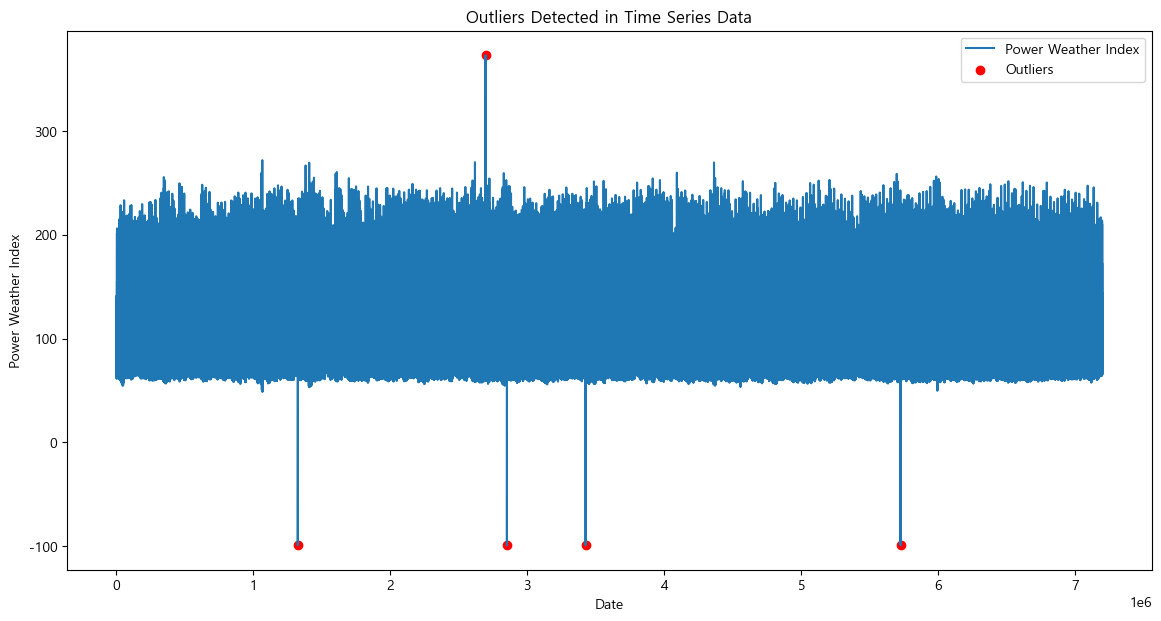

In [80]:
from scipy import stats

ts_data = data['전력기상지수']

# z-score 계산
z_scores = np.abs(stats.zscore(ts_data))

# z-score가 7보다 큰 값을 이상치로 간주
outliers = ts_data[z_scores > 7]

# 이상치 표시
plt.figure(figsize=(14, 7))
plt.plot(ts_data, label='Power Weather Index')
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Power Weather Index')
plt.title('Outliers Detected in Time Series Data')
plt.legend()
plt.show()

In [81]:
# 날짜를 datetime 형식으로 변환
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)

outlier_base = 7

# 전력기상지수의 이상치 탐지 (예제로 Z-score 방법 사용)
z_scores = np.abs(stats.zscore(data['전력기상지수']))
outliers = data[z_scores > outlier_base]

# 지점번호별 월 평균 전력기상지수 계산
mean_by_station_and_month = data.groupby(['지점번호', '월'])['전력기상지수'].mean().reset_index()
mean_by_station_and_month.rename(columns={'전력기상지수': '월별_평균_전력기상지수'}, inplace=True)

# 원본 데이터와 월별 평균값을 결합 (merge)
data = data.reset_index()
data = pd.merge(data, mean_by_station_and_month, on=['지점번호', '월'], how='left')

# 이상치를 월별 평균값으로 대체
data['전력기상지수'] = np.where(z_scores > outlier_base, data['월별_평균_전력기상지수'], data['전력기상지수'])

# 필요에 따라 사용된 임시 열 제거
data.drop(columns=['월별_평균_전력기상지수'], inplace=True)

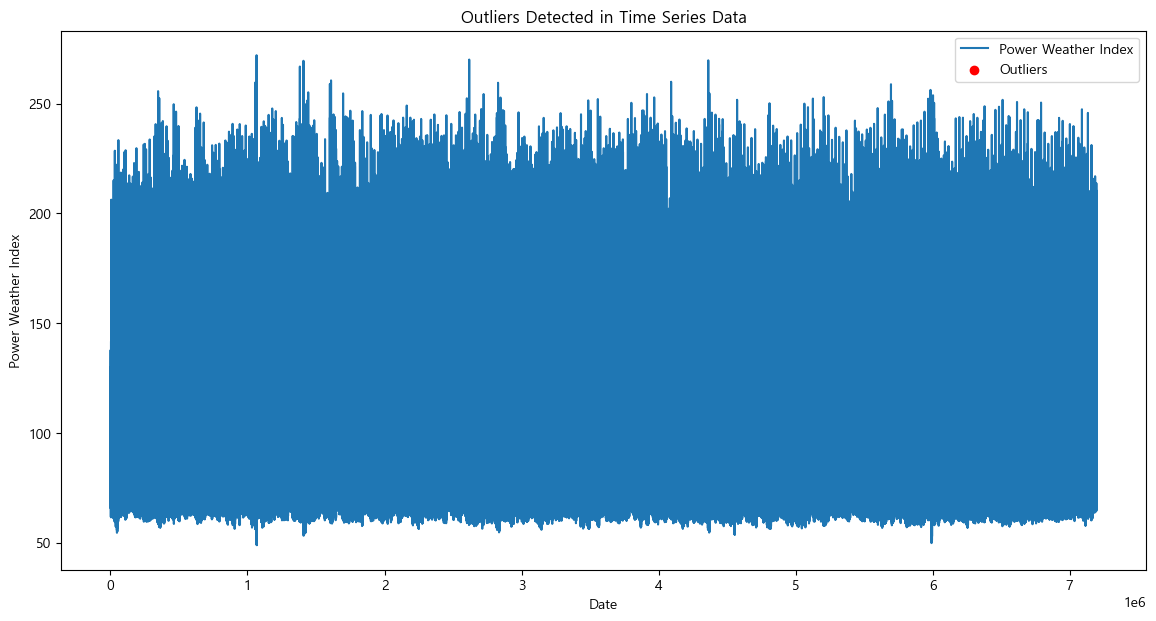

In [82]:
from scipy import stats

ts_data = data['전력기상지수']

# z-score 계산
z_scores = np.abs(stats.zscore(ts_data))

# z-score가 7보다 큰 값을 이상치로 간주
outliers = ts_data[z_scores > 7]

# 이상치 표시
plt.figure(figsize=(14, 7))
plt.plot(ts_data, label='Power Weather Index')
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Power Weather Index')
plt.title('Outliers Detected in Time Series Data')
plt.legend()
plt.show()

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7198675 entries, 0 to 7198674
Data columns (total 20 columns):
 #   Column    Dtype         
---  ------    -----         
 0   날짜        datetime64[ns]
 1   격자넘버      int64         
 2   시간        int64         
 3   공동주택수     int64         
 4   지점번호      int64         
 5   계약전력합계    int64         
 6   전력수요_합계   float64       
 7   전력부하량_평균  float64       
 8   기온        float64       
 9   상대습도      float64       
 10  풍속        float64       
 11  강수량       float64       
 12  체감온도      float64       
 13  요일        int64         
 14  주중_주말     int64         
 15  전력기상지수    float64       
 16  년         int64         
 17  월         int64         
 18  일         int64         
 19  분기        int64         
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 1.1 GB


In [84]:
import torch
from torch.utils.data import Dataset,DataLoader

In [85]:
class LTSF_Linear(torch.nn.Module):
    def __init__(self, window_size, forcast_size, individual, feature_size):
        super(LTSF_Linear, self).__init__()
        self.window_size = window_size
        self.forcast_size = forcast_size
        self.individual = individual
        self.channels = feature_size
        if self.individual:
            self.Linear = torch.nn.ModuleList()
            for i in range(self.channels):
                self.Linear.append(torch.nn.Linear(self.window_size, self.forcast_size))
        else:
            self.Linear = torch.nn.Linear(self.window_size, self.forcast_size)

    def forward(self, x):
        if self.individual:
            output = torch.zeros([x.size(0), self.forcast_size, x.size(2)],dtype=x.dtype).to(x.device)
            for i in range(self.channels):
                output[:,:,i] = self.Linear[i](x[:,:,i])
            x = output
        else:
            x = self.Linear(x.permute(0,2,1)).permute(0,2,1)
        return x

In [86]:
class moving_avg(torch.nn.Module):
    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size
        self.avg = torch.nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x

class series_decomp(torch.nn.Module):
    def __init__(self, kernel_size):
        super(series_decomp, self).__init__()
        self.moving_avg = moving_avg(kernel_size, stride=1)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        residual = x - moving_mean
        return moving_mean, residual 
        
class LTSF_DLinear(torch.nn.Module):
    def __init__(self, window_size, forcast_size, kernel_size, individual, feature_size):
        super(LTSF_DLinear, self).__init__()
        self.window_size = window_size
        self.forcast_size = forcast_size
        self.decompsition = series_decomp(kernel_size)
        self.individual = individual
        self.channels = feature_size
        if self.individual:
            self.Linear_Seasonal = torch.nn.ModuleList()
            self.Linear_Trend = torch.nn.ModuleList()
            for i in range(self.channels):
                self.Linear_Trend.append(torch.nn.Linear(self.window_size, self.forcast_size))
                self.Linear_Trend[i].weight = torch.nn.Parameter((1/self.window_size)*torch.ones([self.forcast_size, self.window_size]))
                self.Linear_Seasonal.append(torch.nn.Linear(self.window_size, self.forcast_size))
                self.Linear_Seasonal[i].weight = torch.nn.Parameter((1/self.window_size)*torch.ones([self.forcast_size, self.window_size]))
        else:
            self.Linear_Trend = torch.nn.Linear(self.window_size, self.forcast_size)
            self.Linear_Trend.weight = torch.nn.Parameter((1/self.window_size)*torch.ones([self.forcast_size, self.window_size]))
            self.Linear_Seasonal = torch.nn.Linear(self.window_size,  self.forcast_size)
            self.Linear_Seasonal.weight = torch.nn.Parameter((1/self.window_size)*torch.ones([self.forcast_size, self.window_size]))

    def forward(self, x):
        trend_init, seasonal_init = self.decompsition(x)
        trend_init, seasonal_init = trend_init.permute(0,2,1), seasonal_init.permute(0,2,1)
        if self.individual:
            trend_output = torch.zeros([trend_init.size(0), trend_init.size(1), self.forcast_size], dtype=trend_init.dtype).to(trend_init.device)
            seasonal_output = torch.zeros([seasonal_init.size(0), seasonal_init.size(1), self.forcast_size], dtype=seasonal_init.dtype).to(seasonal_init.device)
            for idx in range(self.channels):
                trend_output[:, idx, :] = self.Linear_Trend[idx](trend_init[:, idx, :])
                seasonal_output[:, idx, :] = self.Linear_Seasonal[idx](seasonal_init[:, idx, :])                
        else:
            trend_output = self.Linear_Trend(trend_init)
            seasonal_output = self.Linear_Seasonal(seasonal_init)
        x = seasonal_output + trend_output
        return x.permute(0,2,1)

In [87]:
def standardization(train_df, test_df, cols, target):
    train_df_ = train_df.copy()
    test_df_ = test_df.copy()
    col =  [col for col in list(train_df.columns) if col not in cols]
    mean_list = []
    std_list = []
    for x in col:
        mean, std = train_df_.agg(["mean", "std"]).loc[:,x]
        mean_list.append(mean)
        std_list.append(std)
        train_df_.loc[:, x] = (train_df_[x] - mean) / std
        test_df_.loc[:, x] = (test_df_[x] - mean) / std
    return train_df_, test_df_, mean_list[col.index(target)], std_list[col.index(target)]

class Data(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.Y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

def time_slide_df(df, window_size, forcast_size, date, target):
    df_ = df.copy()
    data_list = []
    dap_list = []
    date_list = []
    for idx in range(0, df_.shape[0]-window_size-forcast_size+1):
        print(idx)
        x = df_.loc[idx:idx+window_size-1, target].values.reshape(window_size, 1)
        y = df_.loc[idx+window_size:idx+window_size+forcast_size-1, target].values
        date_ = df_.loc[idx+window_size:idx+window_size+forcast_size-1, date].values
        data_list.append(x)
        dap_list.append(y)
        date_list.append(date_)
    return np.array(data_list, dtype='float32'), np.array(dap_list, dtype='float32'), np.array(date_list)

In [106]:
def time_slide_df(df, window_size, forcast_size, date, target):
    df_ = df.copy()
    data_list = []
    dap_list = []
    date_list = []

    # 데이터프레임 크기 확인
    total_size = window_size + forcast_size
    df_size = df_.shape[0]

    # 디버깅을 위해 데이터프레임의 크기와 슬라이딩 윈도우의 크기 출력
    print(f"Dataframe size: {df_size}, Total window size: {total_size}")

    for idx in range(0, df_size - total_size + 1):
        try:
            x = df_.loc[idx:idx + window_size - 1, target].values
            y = df_.loc[idx + window_size:idx + window_size + forcast_size - 1, target].values
            date_ = df_.loc[idx + window_size:idx + window_size + forcast_size - 1, date].values

            # 디버깅을 위해 각 슬라이싱 범위 출력
            print(f"Index {idx}: x range ({idx}, {idx + window_size - 1}), y range ({idx + window_size}, {idx + window_size + forcast_size - 1})")

            # 슬라이딩 윈도우가 비어 있는지 확인
            if x.size == 0 or y.size == 0:
                print(f"Empty array at index {idx}: x size={x.size}, y size={y.size}")
                continue

            x = x.reshape(window_size, 1)
            data_list.append(x)
            dap_list.append(y)
            date_list.append(date_)

            print(f"Processed index {idx}")

        except Exception as e:
            print(f"Error at index {idx}: {e}")
            break

    return np.array(data_list, dtype='float32'), np.array(dap_list, dtype='float32'), np.array(date_list)

In [119]:
features = ['격자넘버','날짜','공동주택수', '계약전력합계', '전력수요_합계', '전력부하량_평균', '기온', '상대습도', '풍속', '강수량', '체감온도', '년', '월', '일', '시간', '요일', '분기', '지점번호', '전력기상지수']

train_data, valid_data = data[data['날짜'].dt.year < 2022], data[data['날짜'].dt.year >= 2022]

train_data = train_data[features]
valid_data = valid_data[features]

numeric_features = ['공동주택수', '계약전력합계', '전력수요_합계', '전력부하량_평균', '기온', '상대습도', '풍속', '강수량', '체감온도', '년', '월', '일', '시간']
categorical_features = ['요일', '분기', '지점번호']


#모델 검증을 위해 카테고리형 변수로 변환
for f in categorical_features:
    train_data[f] = train_data[f].astype('category')

for f in categorical_features:
    valid_data[f] = valid_data[f].astype('category')

In [120]:
train_data.head()

,격자넘버,날짜,공동주택수,계약전력합계,전력수요_합계,전력부하량_평균,기온,상대습도,풍속,강수량,체감온도,년,월,일,시간,요일,분기,지점번호,전력기상지수
0,5565,2020-01-01 01:00:00,58,42250,4468.72,79.776051,2.3,65.8,1.7,0.0,-0.3,2020,1,1,1,2,1,184,96.58
1,5565,2020-01-01 02:00:00,58,42250,4101.00,79.776051,2.5,69.7,1.8,0.0,-0.2,2020,1,1,2,2,1,184,88.63
2,5565,2020-01-01 03:00:00,58,42250,3724.60,79.776051,2.8,69.5,2.3,0.0,-0.2,2020,1,1,3,2,1,184,80.50
3,5565,2020-01-01 04:00:00,58,42250,3484.40,79.776051,2.8,66.0,1.6,0.0,0.5,2020,1,1,4,2,1,184,75.31
4,5565,2020-01-01 05:00:00,58,42250,3409.12,79.776051,3.0,66.1,1.6,0.0,0.5,2020,1,1,5,2,1,184,73.68


In [121]:
train_data[train_data['격자넘버']==5565]

,격자넘버,날짜,공동주택수,계약전력합계,전력수요_합계,전력부하량_평균,기온,상대습도,풍속,강수량,체감온도,년,월,일,시간,요일,분기,지점번호,전력기상지수
0,5565,2020-01-01 01:00:00,58,42250,4468.72,79.776051,2.3,65.8,1.7,0.0,-0.3,2020,1,1,1,2,1,184,96.58
1,5565,2020-01-01 02:00:00,58,42250,4101.00,79.776051,2.5,69.7,1.8,0.0,-0.2,2020,1,1,2,2,1,184,88.63
2,5565,2020-01-01 03:00:00,58,42250,3724.60,79.776051,2.8,69.5,2.3,0.0,-0.2,2020,1,1,3,2,1,184,80.50
3,5565,2020-01-01 04:00:00,58,42250,3484.40,79.776051,2.8,66.0,1.6,0.0,0.5,2020,1,1,4,2,1,184,75.31
4,5565,2020-01-01 05:00:00,58,42250,3409.12,79.776051,3.0,66.1,1.6,0.0,0.5,2020,1,1,5,2,1,184,73.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17538,5565,2021-12-31 19:00:00,49,36690,4929.12,81.052601,4.6,68.0,4.6,0.0,0.7,2021,12,31,19,4,4,184,124.11
17539,5565,2021-12-31 20:00:00,49,36690,4936.00,81.052601,4.2,65.2,4.1,0.0,0.3,2021,12,31,20,4,4,184,124.28
17540,5565,2021-12-31 21:00:00,49,36690,4962.64,81.052601,3.9,65.8,3.6,0.0,0.4,2021,12,31,21,4,4,184,124.95
17541,5565,2021-12-31 22:00:00,49,36690,4842.08,81.052601,3.6,68.5,3.8,0.0,-0.1,2021,12,31,22,4,4,184,121.92


In [122]:
valid_data[valid_data['격자넘버']==5565]

,격자넘버,날짜,공동주택수,계약전력합계,전력수요_합계,전력부하량_평균,기온,상대습도,풍속,강수량,체감온도,년,월,일,시간,요일,분기,지점번호,전력기상지수
17543,5565,2022-01-01 00:00:00,49,36690,4317.00,81.052601,3.4,66.5,2.5,0.0,0.5,2022,1,1,24,5,1,184,108.70
17544,5565,2022-01-01 01:00:00,32,25550,2777.60,94.107824,3.2,66.7,1.8,0.0,0.6,2022,1,1,1,5,1,184,92.23
17545,5565,2022-01-01 02:00:00,32,25550,2504.20,94.107824,3.0,60.6,2.5,0.0,-0.1,2022,1,1,2,5,1,184,83.16
17546,5565,2022-01-01 03:00:00,32,25550,2302.00,94.107824,2.7,63.6,2.7,0.0,-0.9,2022,1,1,3,5,1,184,76.44
17547,5565,2022-01-01 04:00:00,32,25550,2113.64,94.107824,2.1,64.2,2.2,0.0,-1.0,2022,1,1,4,5,1,184,70.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,5565,2022-12-31 20:00:00,32,25550,3405.12,94.107824,6.6,57.3,2.3,0.0,4.9,2022,12,31,20,5,4,184,113.07
26300,5565,2022-12-31 21:00:00,32,25550,3462.64,94.107824,6.3,59.9,2.1,0.0,4.8,2022,12,31,21,5,4,184,114.98
26301,5565,2022-12-31 22:00:00,32,25550,3412.04,94.107824,5.4,62.9,2.1,0.0,3.7,2022,12,31,22,5,4,184,113.30
26302,5565,2022-12-31 23:00:00,32,25550,3225.40,94.107824,4.5,67.1,2.0,0.0,2.8,2022,12,31,23,5,4,184,107.10


In [92]:
num_li = list(train_data['격자넘버'].unique())

In [93]:
for i in num_li:
    print(i, train_data[train_data['격자넘버']==i]['년'].nunique())

5565 2
5566 2
9609 1
9735 2
9736 2
9758 2
9759 2
9884 2
9885 2
10069 2
10070 2
10218 2
10222 2
10223 2
10224 1
10351 2
10352 2
10354 2
10486 2
10487 2
10787 2
10808 2
10824 2
10934 2
10935 2
10936 2
10937 2
10970 2
10972 2
10973 2
10974 2
10975 1
11083 2
11084 2
11085 2
11086 2
11106 2
11107 2
11115 2
11117 2
11119 1
11122 2
11123 2
11124 2
11125 2
11126 2
11233 2
11256 2
11264 2
11266 2
11268 2
11271 1
11272 2
11273 2
11274 2
11275 2
11412 2
11413 2
11414 2
11415 2
11418 2
11419 2
11421 2
11422 2
11423 2
11424 2
11562 1
11571 2
11718 2
11719 2
11870 2
12276 2
12320 2
12468 2
12469 2
12618 1
12619 1
12742 2
12767 2
13022 2
13026 2
13174 2
13175 2
13176 2
13199 2
13200 2
13202 1
13203 2
13204 2
13323 2
13324 2
13347 2
13348 2
13349 2
13350 2
13351 2
13352 2
13470 2
13497 2
13498 2
13499 2
13500 2
13501 2
13510 2
13614 2
13615 2
13619 2
13647 2
13648 1
13803 2
13959 2
14090 2
14091 2
14092 2
14108 2
14235 2
14236 2
14239 2
14240 2
14241 2
14257 2
14258 1
14366 2
14388 2
14667 2
14668 2
1

In [123]:
### 데이터 셋 생성 ###
window_size = 72
forcast_size= 24
batch_size = 32
targets = '전력기상지수'
date = '날짜'
not_col = ['요일', '분기', '지점번호','날짜']

train_sample = train_data[train_data['격자넘버']==5565]
valid_sample = valid_data[valid_data['격자넘버']==5565]

train_sample, valid_sample, mean_, std_ = standardization(train_sample, valid_sample, not_col, targets)

C:\Users\Jonnior_P\AppData\Local\Temp\ipykernel_20708\2238326230.py:8: FutureWarning: ['요일', '분기', '지점번호'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mean, std = train_df_.agg(["mean", "std"]).loc[:,x]
C:\Users\Jonnior_P\AppData\Local\Temp\ipykernel_20708\2238326230.py:8: FutureWarning: ['요일', '분기', '지점번호'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mean, std = train_df_.agg(["mean", "std"]).loc[:,x]
C:\Users\Jonnior_P\AppData\Local\Temp\ipykernel_20708\2238326230.py:8: FutureWarning: ['요일', '분기', '지점번호'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mean, std = train_df_.agg(["mean", "std"]).loc[:,x]
C:\Users\Jonnior_P\AppData\Local\Temp\ipykernel_20708\2238326230.py:8: Fu

In [124]:
train_sample.shape[0]

17543

In [125]:
train_sample.head()

,격자넘버,날짜,공동주택수,계약전력합계,전력수요_합계,전력부하량_평균,기온,상대습도,풍속,강수량,체감온도,년,월,일,시간,요일,분기,지점번호,전력기상지수
0,NaN,2020-01-01 01:00:00,0.998547,0.998547,0.159123,-0.998547,-1.896983,-0.461050,-0.685788,-0.128339,-1.879488,-0.998661,-1.600278,-1.674242,-1.661266,2,1,184,-0.146255
1,NaN,2020-01-01 02:00:00,0.998547,0.998547,-0.187150,-0.998547,-1.870549,-0.190944,-0.632993,-0.128339,-1.868632,-0.998661,-1.600278,-1.674242,-1.516800,2,1,184,-0.486284
2,NaN,2020-01-01 03:00:00,0.998547,0.998547,-0.541597,-0.998547,-1.830898,-0.204796,-0.369016,-0.128339,-1.868632,-0.998661,-1.600278,-1.674242,-1.372334,2,1,184,-0.834011
3,NaN,2020-01-01 04:00:00,0.998547,0.998547,-0.767787,-0.998547,-1.830898,-0.447198,-0.738584,-0.128339,-1.792639,-0.998661,-1.600278,-1.674242,-1.227868,2,1,184,-1.055992
4,NaN,2020-01-01 05:00:00,0.998547,0.998547,-0.838676,-0.998547,-1.804464,-0.440272,-0.738584,-0.128339,-1.792639,-0.998661,-1.600278,-1.674242,-1.083401,2,1,184,-1.125708


In [134]:
valid_sample = valid_sample.reset_index()

In [135]:
valid_sample.head()

,index,격자넘버,날짜,공동주택수,계약전력합계,전력수요_합계,전력부하량_평균,기온,상대습도,풍속,강수량,체감온도,년,월,일,시간,요일,분기,지점번호,전력기상지수
0,17543,NaN,2022-01-01 00:00:00,-1.001398,-1.001398,0.016252,1.001398,-1.751595,-0.412569,-0.263426,-0.128339,-1.792639,3.001228,-1.600278,-1.674242,1.661455,5,1,184,0.372128
1,17544,NaN,2022-01-01 01:00:00,-4.779071,-5.008482,-1.433363,21.454760,-1.778030,-0.398718,-0.632993,-0.128339,-1.781782,3.001228,-1.600278,-1.674242,-1.661266,5,1,184,-0.332309
2,17545,NaN,2022-01-01 02:00:00,-4.779071,-5.008482,-1.690817,21.454760,-1.804464,-0.821190,-0.263426,-0.128339,-1.857776,3.001228,-1.600278,-1.674242,-1.516800,5,1,184,-0.720240
3,17546,NaN,2022-01-01 03:00:00,-4.779071,-5.008482,-1.881224,21.454760,-1.844115,-0.613417,-0.157835,-0.128339,-1.944626,3.001228,-1.600278,-1.674242,-1.372334,5,1,184,-1.007661
4,17547,NaN,2022-01-01 04:00:00,-4.779071,-5.008482,-2.058598,21.454760,-1.923418,-0.571862,-0.421812,-0.128339,-1.955482,3.001228,-1.600278,-1.674242,-1.227868,5,1,184,-1.274979


In [127]:
train_x, train_y, train_date = time_slide_df(train_sample, window_size, forcast_size, date, targets)

Dataframe size: 17543, Total window size: 96
Index 0: x range (0, 71), y range (72, 95)
Processed index 0
Index 1: x range (1, 72), y range (73, 96)
Processed index 1
Index 2: x range (2, 73), y range (74, 97)
Processed index 2
Index 3: x range (3, 74), y range (75, 98)
Processed index 3
Index 4: x range (4, 75), y range (76, 99)
Processed index 4
Index 5: x range (5, 76), y range (77, 100)
Processed index 5
Index 6: x range (6, 77), y range (78, 101)
Processed index 6
Index 7: x range (7, 78), y range (79, 102)
Processed index 7
Index 8: x range (8, 79), y range (80, 103)
Processed index 8
Index 9: x range (9, 80), y range (81, 104)
Processed index 9
Index 10: x range (10, 81), y range (82, 105)
Processed index 10
Index 11: x range (11, 82), y range (83, 106)
Processed index 11
Index 12: x range (12, 83), y range (84, 107)
Processed index 12
Index 13: x range (13, 84), y range (85, 108)
Processed index 13
Index 14: x range (14, 85), y range (86, 109)
Processed index 14
Index 15: x ran

Index 610: x range (610, 681), y range (682, 705)
Processed index 610
Index 611: x range (611, 682), y range (683, 706)
Processed index 611
Index 612: x range (612, 683), y range (684, 707)
Processed index 612
Index 613: x range (613, 684), y range (685, 708)
Processed index 613
Index 614: x range (614, 685), y range (686, 709)
Processed index 614
Index 615: x range (615, 686), y range (687, 710)
Processed index 615
Index 616: x range (616, 687), y range (688, 711)
Processed index 616
Index 617: x range (617, 688), y range (689, 712)
Processed index 617
Index 618: x range (618, 689), y range (690, 713)
Processed index 618
Index 619: x range (619, 690), y range (691, 714)
Processed index 619
Index 620: x range (620, 691), y range (692, 715)
Processed index 620
Index 621: x range (621, 692), y range (693, 716)
Processed index 621
Index 622: x range (622, 693), y range (694, 717)
Processed index 622
Index 623: x range (623, 694), y range (695, 718)
Processed index 623
Index 624: x range (

Index 1222: x range (1222, 1293), y range (1294, 1317)
Processed index 1222
Index 1223: x range (1223, 1294), y range (1295, 1318)
Processed index 1223
Index 1224: x range (1224, 1295), y range (1296, 1319)
Processed index 1224
Index 1225: x range (1225, 1296), y range (1297, 1320)
Processed index 1225
Index 1226: x range (1226, 1297), y range (1298, 1321)
Processed index 1226
Index 1227: x range (1227, 1298), y range (1299, 1322)
Processed index 1227
Index 1228: x range (1228, 1299), y range (1300, 1323)
Processed index 1228
Index 1229: x range (1229, 1300), y range (1301, 1324)
Processed index 1229
Index 1230: x range (1230, 1301), y range (1302, 1325)
Processed index 1230
Index 1231: x range (1231, 1302), y range (1303, 1326)
Processed index 1231
Index 1232: x range (1232, 1303), y range (1304, 1327)
Processed index 1232
Index 1233: x range (1233, 1304), y range (1305, 1328)
Processed index 1233
Index 1234: x range (1234, 1305), y range (1306, 1329)
Processed index 1234
Index 1235: 

Index 1987: x range (1987, 2058), y range (2059, 2082)
Processed index 1987
Index 1988: x range (1988, 2059), y range (2060, 2083)
Processed index 1988
Index 1989: x range (1989, 2060), y range (2061, 2084)
Processed index 1989
Index 1990: x range (1990, 2061), y range (2062, 2085)
Processed index 1990
Index 1991: x range (1991, 2062), y range (2063, 2086)
Processed index 1991
Index 1992: x range (1992, 2063), y range (2064, 2087)
Processed index 1992
Index 1993: x range (1993, 2064), y range (2065, 2088)
Processed index 1993
Index 1994: x range (1994, 2065), y range (2066, 2089)
Processed index 1994
Index 1995: x range (1995, 2066), y range (2067, 2090)
Processed index 1995
Index 1996: x range (1996, 2067), y range (2068, 2091)
Processed index 1996
Index 1997: x range (1997, 2068), y range (2069, 2092)
Processed index 1997
Index 1998: x range (1998, 2069), y range (2070, 2093)
Processed index 1998
Index 1999: x range (1999, 2070), y range (2071, 2094)
Processed index 1999
Index 2000: 

Index 2641: x range (2641, 2712), y range (2713, 2736)
Processed index 2641
Index 2642: x range (2642, 2713), y range (2714, 2737)
Processed index 2642
Index 2643: x range (2643, 2714), y range (2715, 2738)
Processed index 2643
Index 2644: x range (2644, 2715), y range (2716, 2739)
Processed index 2644
Index 2645: x range (2645, 2716), y range (2717, 2740)
Processed index 2645
Index 2646: x range (2646, 2717), y range (2718, 2741)
Processed index 2646
Index 2647: x range (2647, 2718), y range (2719, 2742)
Processed index 2647
Index 2648: x range (2648, 2719), y range (2720, 2743)
Processed index 2648
Index 2649: x range (2649, 2720), y range (2721, 2744)
Processed index 2649
Index 2650: x range (2650, 2721), y range (2722, 2745)
Processed index 2650
Index 2651: x range (2651, 2722), y range (2723, 2746)
Processed index 2651
Index 2652: x range (2652, 2723), y range (2724, 2747)
Processed index 2652
Index 2653: x range (2653, 2724), y range (2725, 2748)
Processed index 2653
Index 2654: 

Index 3310: x range (3310, 3381), y range (3382, 3405)
Processed index 3310
Index 3311: x range (3311, 3382), y range (3383, 3406)
Processed index 3311
Index 3312: x range (3312, 3383), y range (3384, 3407)
Processed index 3312
Index 3313: x range (3313, 3384), y range (3385, 3408)
Processed index 3313
Index 3314: x range (3314, 3385), y range (3386, 3409)
Processed index 3314
Index 3315: x range (3315, 3386), y range (3387, 3410)
Processed index 3315
Index 3316: x range (3316, 3387), y range (3388, 3411)
Processed index 3316
Index 3317: x range (3317, 3388), y range (3389, 3412)
Processed index 3317
Index 3318: x range (3318, 3389), y range (3390, 3413)
Processed index 3318
Index 3319: x range (3319, 3390), y range (3391, 3414)
Processed index 3319
Index 3320: x range (3320, 3391), y range (3392, 3415)
Processed index 3320
Index 3321: x range (3321, 3392), y range (3393, 3416)
Processed index 3321
Index 3322: x range (3322, 3393), y range (3394, 3417)
Processed index 3322
Index 3323: 

Index 3966: x range (3966, 4037), y range (4038, 4061)
Processed index 3966
Index 3967: x range (3967, 4038), y range (4039, 4062)
Processed index 3967
Index 3968: x range (3968, 4039), y range (4040, 4063)
Processed index 3968
Index 3969: x range (3969, 4040), y range (4041, 4064)
Processed index 3969
Index 3970: x range (3970, 4041), y range (4042, 4065)
Processed index 3970
Index 3971: x range (3971, 4042), y range (4043, 4066)
Processed index 3971
Index 3972: x range (3972, 4043), y range (4044, 4067)
Processed index 3972
Index 3973: x range (3973, 4044), y range (4045, 4068)
Processed index 3973
Index 3974: x range (3974, 4045), y range (4046, 4069)
Processed index 3974
Index 3975: x range (3975, 4046), y range (4047, 4070)
Processed index 3975
Index 3976: x range (3976, 4047), y range (4048, 4071)
Processed index 3976
Index 3977: x range (3977, 4048), y range (4049, 4072)
Processed index 3977
Index 3978: x range (3978, 4049), y range (4050, 4073)
Processed index 3978
Index 3979: 

Index 4628: x range (4628, 4699), y range (4700, 4723)
Processed index 4628
Index 4629: x range (4629, 4700), y range (4701, 4724)
Processed index 4629
Index 4630: x range (4630, 4701), y range (4702, 4725)
Processed index 4630
Index 4631: x range (4631, 4702), y range (4703, 4726)
Processed index 4631
Index 4632: x range (4632, 4703), y range (4704, 4727)
Processed index 4632
Index 4633: x range (4633, 4704), y range (4705, 4728)
Processed index 4633
Index 4634: x range (4634, 4705), y range (4706, 4729)
Processed index 4634
Index 4635: x range (4635, 4706), y range (4707, 4730)
Processed index 4635
Index 4636: x range (4636, 4707), y range (4708, 4731)
Processed index 4636
Index 4637: x range (4637, 4708), y range (4709, 4732)
Processed index 4637
Index 4638: x range (4638, 4709), y range (4710, 4733)
Processed index 4638
Index 4639: x range (4639, 4710), y range (4711, 4734)
Processed index 4639
Index 4640: x range (4640, 4711), y range (4712, 4735)
Processed index 4640
Index 4641: 

Index 5300: x range (5300, 5371), y range (5372, 5395)
Processed index 5300
Index 5301: x range (5301, 5372), y range (5373, 5396)
Processed index 5301
Index 5302: x range (5302, 5373), y range (5374, 5397)
Processed index 5302
Index 5303: x range (5303, 5374), y range (5375, 5398)
Processed index 5303
Index 5304: x range (5304, 5375), y range (5376, 5399)
Processed index 5304
Index 5305: x range (5305, 5376), y range (5377, 5400)
Processed index 5305
Index 5306: x range (5306, 5377), y range (5378, 5401)
Processed index 5306
Index 5307: x range (5307, 5378), y range (5379, 5402)
Processed index 5307
Index 5308: x range (5308, 5379), y range (5380, 5403)
Processed index 5308
Index 5309: x range (5309, 5380), y range (5381, 5404)
Processed index 5309
Index 5310: x range (5310, 5381), y range (5382, 5405)
Processed index 5310
Index 5311: x range (5311, 5382), y range (5383, 5406)
Processed index 5311
Index 5312: x range (5312, 5383), y range (5384, 5407)
Processed index 5312
Index 5313: 

Index 5923: x range (5923, 5994), y range (5995, 6018)
Processed index 5923
Index 5924: x range (5924, 5995), y range (5996, 6019)
Processed index 5924
Index 5925: x range (5925, 5996), y range (5997, 6020)
Processed index 5925
Index 5926: x range (5926, 5997), y range (5998, 6021)
Processed index 5926
Index 5927: x range (5927, 5998), y range (5999, 6022)
Processed index 5927
Index 5928: x range (5928, 5999), y range (6000, 6023)
Processed index 5928
Index 5929: x range (5929, 6000), y range (6001, 6024)
Processed index 5929
Index 5930: x range (5930, 6001), y range (6002, 6025)
Processed index 5930
Index 5931: x range (5931, 6002), y range (6003, 6026)
Processed index 5931
Index 5932: x range (5932, 6003), y range (6004, 6027)
Processed index 5932
Index 5933: x range (5933, 6004), y range (6005, 6028)
Processed index 5933
Index 5934: x range (5934, 6005), y range (6006, 6029)
Processed index 5934
Index 5935: x range (5935, 6006), y range (6007, 6030)
Processed index 5935
Index 5936: 

Index 6625: x range (6625, 6696), y range (6697, 6720)
Processed index 6625
Index 6626: x range (6626, 6697), y range (6698, 6721)
Processed index 6626
Index 6627: x range (6627, 6698), y range (6699, 6722)
Processed index 6627
Index 6628: x range (6628, 6699), y range (6700, 6723)
Processed index 6628
Index 6629: x range (6629, 6700), y range (6701, 6724)
Processed index 6629
Index 6630: x range (6630, 6701), y range (6702, 6725)
Processed index 6630
Index 6631: x range (6631, 6702), y range (6703, 6726)
Processed index 6631
Index 6632: x range (6632, 6703), y range (6704, 6727)
Processed index 6632
Index 6633: x range (6633, 6704), y range (6705, 6728)
Processed index 6633
Index 6634: x range (6634, 6705), y range (6706, 6729)
Processed index 6634
Index 6635: x range (6635, 6706), y range (6707, 6730)
Processed index 6635
Index 6636: x range (6636, 6707), y range (6708, 6731)
Processed index 6636
Index 6637: x range (6637, 6708), y range (6709, 6732)
Processed index 6637
Index 6638: 

Index 7299: x range (7299, 7370), y range (7371, 7394)
Processed index 7299
Index 7300: x range (7300, 7371), y range (7372, 7395)
Processed index 7300
Index 7301: x range (7301, 7372), y range (7373, 7396)
Processed index 7301
Index 7302: x range (7302, 7373), y range (7374, 7397)
Processed index 7302
Index 7303: x range (7303, 7374), y range (7375, 7398)
Processed index 7303
Index 7304: x range (7304, 7375), y range (7376, 7399)
Processed index 7304
Index 7305: x range (7305, 7376), y range (7377, 7400)
Processed index 7305
Index 7306: x range (7306, 7377), y range (7378, 7401)
Processed index 7306
Index 7307: x range (7307, 7378), y range (7379, 7402)
Processed index 7307
Index 7308: x range (7308, 7379), y range (7380, 7403)
Processed index 7308
Index 7309: x range (7309, 7380), y range (7381, 7404)
Processed index 7309
Index 7310: x range (7310, 7381), y range (7382, 7405)
Processed index 7310
Index 7311: x range (7311, 7382), y range (7383, 7406)
Processed index 7311
Index 7312: 

Index 7838: x range (7838, 7909), y range (7910, 7933)
Processed index 7838
Index 7839: x range (7839, 7910), y range (7911, 7934)
Processed index 7839
Index 7840: x range (7840, 7911), y range (7912, 7935)
Processed index 7840
Index 7841: x range (7841, 7912), y range (7913, 7936)
Processed index 7841
Index 7842: x range (7842, 7913), y range (7914, 7937)
Processed index 7842
Index 7843: x range (7843, 7914), y range (7915, 7938)
Processed index 7843
Index 7844: x range (7844, 7915), y range (7916, 7939)
Processed index 7844
Index 7845: x range (7845, 7916), y range (7917, 7940)
Processed index 7845
Index 7846: x range (7846, 7917), y range (7918, 7941)
Processed index 7846
Index 7847: x range (7847, 7918), y range (7919, 7942)
Processed index 7847
Index 7848: x range (7848, 7919), y range (7920, 7943)
Processed index 7848
Index 7849: x range (7849, 7920), y range (7921, 7944)
Processed index 7849
Index 7850: x range (7850, 7921), y range (7922, 7945)
Processed index 7850
Index 7851: 

Index 8436: x range (8436, 8507), y range (8508, 8531)
Processed index 8436
Index 8437: x range (8437, 8508), y range (8509, 8532)
Processed index 8437
Index 8438: x range (8438, 8509), y range (8510, 8533)
Processed index 8438
Index 8439: x range (8439, 8510), y range (8511, 8534)
Processed index 8439
Index 8440: x range (8440, 8511), y range (8512, 8535)
Processed index 8440
Index 8441: x range (8441, 8512), y range (8513, 8536)
Processed index 8441
Index 8442: x range (8442, 8513), y range (8514, 8537)
Processed index 8442
Index 8443: x range (8443, 8514), y range (8515, 8538)
Processed index 8443
Index 8444: x range (8444, 8515), y range (8516, 8539)
Processed index 8444
Index 8445: x range (8445, 8516), y range (8517, 8540)
Processed index 8445
Index 8446: x range (8446, 8517), y range (8518, 8541)
Processed index 8446
Index 8447: x range (8447, 8518), y range (8519, 8542)
Processed index 8447
Index 8448: x range (8448, 8519), y range (8520, 8543)
Processed index 8448
Index 8449: 

Index 9116: x range (9116, 9187), y range (9188, 9211)
Processed index 9116
Index 9117: x range (9117, 9188), y range (9189, 9212)
Processed index 9117
Index 9118: x range (9118, 9189), y range (9190, 9213)
Processed index 9118
Index 9119: x range (9119, 9190), y range (9191, 9214)
Processed index 9119
Index 9120: x range (9120, 9191), y range (9192, 9215)
Processed index 9120
Index 9121: x range (9121, 9192), y range (9193, 9216)
Processed index 9121
Index 9122: x range (9122, 9193), y range (9194, 9217)
Processed index 9122
Index 9123: x range (9123, 9194), y range (9195, 9218)
Processed index 9123
Index 9124: x range (9124, 9195), y range (9196, 9219)
Processed index 9124
Index 9125: x range (9125, 9196), y range (9197, 9220)
Processed index 9125
Index 9126: x range (9126, 9197), y range (9198, 9221)
Processed index 9126
Index 9127: x range (9127, 9198), y range (9199, 9222)
Processed index 9127
Index 9128: x range (9128, 9199), y range (9200, 9223)
Processed index 9128
Index 9129: 

Index 10070: x range (10070, 10141), y range (10142, 10165)
Processed index 10070
Index 10071: x range (10071, 10142), y range (10143, 10166)
Processed index 10071
Index 10072: x range (10072, 10143), y range (10144, 10167)
Processed index 10072
Index 10073: x range (10073, 10144), y range (10145, 10168)
Processed index 10073
Index 10074: x range (10074, 10145), y range (10146, 10169)
Processed index 10074
Index 10075: x range (10075, 10146), y range (10147, 10170)
Processed index 10075
Index 10076: x range (10076, 10147), y range (10148, 10171)
Processed index 10076
Index 10077: x range (10077, 10148), y range (10149, 10172)
Processed index 10077
Index 10078: x range (10078, 10149), y range (10150, 10173)
Processed index 10078
Index 10079: x range (10079, 10150), y range (10151, 10174)
Processed index 10079
Index 10080: x range (10080, 10151), y range (10152, 10175)
Processed index 10080
Index 10081: x range (10081, 10152), y range (10153, 10176)
Processed index 10081
Index 10082: x r

Index 10715: x range (10715, 10786), y range (10787, 10810)
Processed index 10715
Index 10716: x range (10716, 10787), y range (10788, 10811)
Processed index 10716
Index 10717: x range (10717, 10788), y range (10789, 10812)
Processed index 10717
Index 10718: x range (10718, 10789), y range (10790, 10813)
Processed index 10718
Index 10719: x range (10719, 10790), y range (10791, 10814)
Processed index 10719
Index 10720: x range (10720, 10791), y range (10792, 10815)
Processed index 10720
Index 10721: x range (10721, 10792), y range (10793, 10816)
Processed index 10721
Index 10722: x range (10722, 10793), y range (10794, 10817)
Processed index 10722
Index 10723: x range (10723, 10794), y range (10795, 10818)
Processed index 10723
Index 10724: x range (10724, 10795), y range (10796, 10819)
Processed index 10724
Index 10725: x range (10725, 10796), y range (10797, 10820)
Processed index 10725
Index 10726: x range (10726, 10797), y range (10798, 10821)
Processed index 10726
Index 10727: x r

Index 11270: x range (11270, 11341), y range (11342, 11365)
Processed index 11270
Index 11271: x range (11271, 11342), y range (11343, 11366)
Processed index 11271
Index 11272: x range (11272, 11343), y range (11344, 11367)
Processed index 11272
Index 11273: x range (11273, 11344), y range (11345, 11368)
Processed index 11273
Index 11274: x range (11274, 11345), y range (11346, 11369)
Processed index 11274
Index 11275: x range (11275, 11346), y range (11347, 11370)
Processed index 11275
Index 11276: x range (11276, 11347), y range (11348, 11371)
Processed index 11276
Index 11277: x range (11277, 11348), y range (11349, 11372)
Processed index 11277
Index 11278: x range (11278, 11349), y range (11350, 11373)
Processed index 11278
Index 11279: x range (11279, 11350), y range (11351, 11374)
Processed index 11279
Index 11280: x range (11280, 11351), y range (11352, 11375)
Processed index 11280
Index 11281: x range (11281, 11352), y range (11353, 11376)
Processed index 11281
Index 11282: x r

Index 11917: x range (11917, 11988), y range (11989, 12012)
Processed index 11917
Index 11918: x range (11918, 11989), y range (11990, 12013)
Processed index 11918
Index 11919: x range (11919, 11990), y range (11991, 12014)
Processed index 11919
Index 11920: x range (11920, 11991), y range (11992, 12015)
Processed index 11920
Index 11921: x range (11921, 11992), y range (11993, 12016)
Processed index 11921
Index 11922: x range (11922, 11993), y range (11994, 12017)
Processed index 11922
Index 11923: x range (11923, 11994), y range (11995, 12018)
Processed index 11923
Index 11924: x range (11924, 11995), y range (11996, 12019)
Processed index 11924
Index 11925: x range (11925, 11996), y range (11997, 12020)
Processed index 11925
Index 11926: x range (11926, 11997), y range (11998, 12021)
Processed index 11926
Index 11927: x range (11927, 11998), y range (11999, 12022)
Processed index 11927
Index 11928: x range (11928, 11999), y range (12000, 12023)
Processed index 11928
Index 11929: x r

Index 12475: x range (12475, 12546), y range (12547, 12570)
Processed index 12475
Index 12476: x range (12476, 12547), y range (12548, 12571)
Processed index 12476
Index 12477: x range (12477, 12548), y range (12549, 12572)
Processed index 12477
Index 12478: x range (12478, 12549), y range (12550, 12573)
Processed index 12478
Index 12479: x range (12479, 12550), y range (12551, 12574)
Processed index 12479
Index 12480: x range (12480, 12551), y range (12552, 12575)
Processed index 12480
Index 12481: x range (12481, 12552), y range (12553, 12576)
Processed index 12481
Index 12482: x range (12482, 12553), y range (12554, 12577)
Processed index 12482
Index 12483: x range (12483, 12554), y range (12555, 12578)
Processed index 12483
Index 12484: x range (12484, 12555), y range (12556, 12579)
Processed index 12484
Index 12485: x range (12485, 12556), y range (12557, 12580)
Processed index 12485
Index 12486: x range (12486, 12557), y range (12558, 12581)
Processed index 12486
Index 12487: x r

Index 13133: x range (13133, 13204), y range (13205, 13228)
Processed index 13133
Index 13134: x range (13134, 13205), y range (13206, 13229)
Processed index 13134
Index 13135: x range (13135, 13206), y range (13207, 13230)
Processed index 13135
Index 13136: x range (13136, 13207), y range (13208, 13231)
Processed index 13136
Index 13137: x range (13137, 13208), y range (13209, 13232)
Processed index 13137
Index 13138: x range (13138, 13209), y range (13210, 13233)
Processed index 13138
Index 13139: x range (13139, 13210), y range (13211, 13234)
Processed index 13139
Index 13140: x range (13140, 13211), y range (13212, 13235)
Processed index 13140
Index 13141: x range (13141, 13212), y range (13213, 13236)
Processed index 13141
Index 13142: x range (13142, 13213), y range (13214, 13237)
Processed index 13142
Index 13143: x range (13143, 13214), y range (13215, 13238)
Processed index 13143
Index 13144: x range (13144, 13215), y range (13216, 13239)
Processed index 13144
Index 13145: x r

Index 13742: x range (13742, 13813), y range (13814, 13837)
Processed index 13742
Index 13743: x range (13743, 13814), y range (13815, 13838)
Processed index 13743
Index 13744: x range (13744, 13815), y range (13816, 13839)
Processed index 13744
Index 13745: x range (13745, 13816), y range (13817, 13840)
Processed index 13745
Index 13746: x range (13746, 13817), y range (13818, 13841)
Processed index 13746
Index 13747: x range (13747, 13818), y range (13819, 13842)
Processed index 13747
Index 13748: x range (13748, 13819), y range (13820, 13843)
Processed index 13748
Index 13749: x range (13749, 13820), y range (13821, 13844)
Processed index 13749
Index 13750: x range (13750, 13821), y range (13822, 13845)
Processed index 13750
Index 13751: x range (13751, 13822), y range (13823, 13846)
Processed index 13751
Index 13752: x range (13752, 13823), y range (13824, 13847)
Processed index 13752
Index 13753: x range (13753, 13824), y range (13825, 13848)
Processed index 13753
Index 13754: x r

Index 14232: x range (14232, 14303), y range (14304, 14327)
Processed index 14232
Index 14233: x range (14233, 14304), y range (14305, 14328)
Processed index 14233
Index 14234: x range (14234, 14305), y range (14306, 14329)
Processed index 14234
Index 14235: x range (14235, 14306), y range (14307, 14330)
Processed index 14235
Index 14236: x range (14236, 14307), y range (14308, 14331)
Processed index 14236
Index 14237: x range (14237, 14308), y range (14309, 14332)
Processed index 14237
Index 14238: x range (14238, 14309), y range (14310, 14333)
Processed index 14238
Index 14239: x range (14239, 14310), y range (14311, 14334)
Processed index 14239
Index 14240: x range (14240, 14311), y range (14312, 14335)
Processed index 14240
Index 14241: x range (14241, 14312), y range (14313, 14336)
Processed index 14241
Index 14242: x range (14242, 14313), y range (14314, 14337)
Processed index 14242
Index 14243: x range (14243, 14314), y range (14315, 14338)
Processed index 14243
Index 14244: x r

Index 14802: x range (14802, 14873), y range (14874, 14897)
Processed index 14802
Index 14803: x range (14803, 14874), y range (14875, 14898)
Processed index 14803
Index 14804: x range (14804, 14875), y range (14876, 14899)
Processed index 14804
Index 14805: x range (14805, 14876), y range (14877, 14900)
Processed index 14805
Index 14806: x range (14806, 14877), y range (14878, 14901)
Processed index 14806
Index 14807: x range (14807, 14878), y range (14879, 14902)
Processed index 14807
Index 14808: x range (14808, 14879), y range (14880, 14903)
Processed index 14808
Index 14809: x range (14809, 14880), y range (14881, 14904)
Processed index 14809
Index 14810: x range (14810, 14881), y range (14882, 14905)
Processed index 14810
Index 14811: x range (14811, 14882), y range (14883, 14906)
Processed index 14811
Index 14812: x range (14812, 14883), y range (14884, 14907)
Processed index 14812
Index 14813: x range (14813, 14884), y range (14885, 14908)
Processed index 14813
Index 14814: x r

Index 15399: x range (15399, 15470), y range (15471, 15494)
Processed index 15399
Index 15400: x range (15400, 15471), y range (15472, 15495)
Processed index 15400
Index 15401: x range (15401, 15472), y range (15473, 15496)
Processed index 15401
Index 15402: x range (15402, 15473), y range (15474, 15497)
Processed index 15402
Index 15403: x range (15403, 15474), y range (15475, 15498)
Processed index 15403
Index 15404: x range (15404, 15475), y range (15476, 15499)
Processed index 15404
Index 15405: x range (15405, 15476), y range (15477, 15500)
Processed index 15405
Index 15406: x range (15406, 15477), y range (15478, 15501)
Processed index 15406
Index 15407: x range (15407, 15478), y range (15479, 15502)
Processed index 15407
Index 15408: x range (15408, 15479), y range (15480, 15503)
Processed index 15408
Index 15409: x range (15409, 15480), y range (15481, 15504)
Processed index 15409
Index 15410: x range (15410, 15481), y range (15482, 15505)
Processed index 15410
Index 15411: x r

Index 15957: x range (15957, 16028), y range (16029, 16052)
Processed index 15957
Index 15958: x range (15958, 16029), y range (16030, 16053)
Processed index 15958
Index 15959: x range (15959, 16030), y range (16031, 16054)
Processed index 15959
Index 15960: x range (15960, 16031), y range (16032, 16055)
Processed index 15960
Index 15961: x range (15961, 16032), y range (16033, 16056)
Processed index 15961
Index 15962: x range (15962, 16033), y range (16034, 16057)
Processed index 15962
Index 15963: x range (15963, 16034), y range (16035, 16058)
Processed index 15963
Index 15964: x range (15964, 16035), y range (16036, 16059)
Processed index 15964
Index 15965: x range (15965, 16036), y range (16037, 16060)
Processed index 15965
Index 15966: x range (15966, 16037), y range (16038, 16061)
Processed index 15966
Index 15967: x range (15967, 16038), y range (16039, 16062)
Processed index 15967
Index 15968: x range (15968, 16039), y range (16040, 16063)
Processed index 15968
Index 15969: x r

Index 16764: x range (16764, 16835), y range (16836, 16859)
Processed index 16764
Index 16765: x range (16765, 16836), y range (16837, 16860)
Processed index 16765
Index 16766: x range (16766, 16837), y range (16838, 16861)
Processed index 16766
Index 16767: x range (16767, 16838), y range (16839, 16862)
Processed index 16767
Index 16768: x range (16768, 16839), y range (16840, 16863)
Processed index 16768
Index 16769: x range (16769, 16840), y range (16841, 16864)
Processed index 16769
Index 16770: x range (16770, 16841), y range (16842, 16865)
Processed index 16770
Index 16771: x range (16771, 16842), y range (16843, 16866)
Processed index 16771
Index 16772: x range (16772, 16843), y range (16844, 16867)
Processed index 16772
Index 16773: x range (16773, 16844), y range (16845, 16868)
Processed index 16773
Index 16774: x range (16774, 16845), y range (16846, 16869)
Processed index 16774
Index 16775: x range (16775, 16846), y range (16847, 16870)
Processed index 16775
Index 16776: x r

Index 17311: x range (17311, 17382), y range (17383, 17406)
Processed index 17311
Index 17312: x range (17312, 17383), y range (17384, 17407)
Processed index 17312
Index 17313: x range (17313, 17384), y range (17385, 17408)
Processed index 17313
Index 17314: x range (17314, 17385), y range (17386, 17409)
Processed index 17314
Index 17315: x range (17315, 17386), y range (17387, 17410)
Processed index 17315
Index 17316: x range (17316, 17387), y range (17388, 17411)
Processed index 17316
Index 17317: x range (17317, 17388), y range (17389, 17412)
Processed index 17317
Index 17318: x range (17318, 17389), y range (17390, 17413)
Processed index 17318
Index 17319: x range (17319, 17390), y range (17391, 17414)
Processed index 17319
Index 17320: x range (17320, 17391), y range (17392, 17415)
Processed index 17320
Index 17321: x range (17321, 17392), y range (17393, 17416)
Processed index 17321
Index 17322: x range (17322, 17393), y range (17394, 17417)
Processed index 17322
Index 17323: x r

In [136]:
test_x, test_y, test_date = time_slide_df(valid_sample, window_size, forcast_size, date, targets)

Dataframe size: 8761, Total window size: 96
Index 0: x range (0, 71), y range (72, 95)
Processed index 0
Index 1: x range (1, 72), y range (73, 96)
Processed index 1
Index 2: x range (2, 73), y range (74, 97)
Processed index 2
Index 3: x range (3, 74), y range (75, 98)
Processed index 3
Index 4: x range (4, 75), y range (76, 99)
Processed index 4
Index 5: x range (5, 76), y range (77, 100)
Processed index 5
Index 6: x range (6, 77), y range (78, 101)
Processed index 6
Index 7: x range (7, 78), y range (79, 102)
Processed index 7
Index 8: x range (8, 79), y range (80, 103)
Processed index 8
Index 9: x range (9, 80), y range (81, 104)
Processed index 9
Index 10: x range (10, 81), y range (82, 105)
Processed index 10
Index 11: x range (11, 82), y range (83, 106)
Processed index 11
Index 12: x range (12, 83), y range (84, 107)
Processed index 12
Index 13: x range (13, 84), y range (85, 108)
Processed index 13
Index 14: x range (14, 85), y range (86, 109)
Processed index 14
Index 15: x rang

Index 607: x range (607, 678), y range (679, 702)
Processed index 607
Index 608: x range (608, 679), y range (680, 703)
Processed index 608
Index 609: x range (609, 680), y range (681, 704)
Processed index 609
Index 610: x range (610, 681), y range (682, 705)
Processed index 610
Index 611: x range (611, 682), y range (683, 706)
Processed index 611
Index 612: x range (612, 683), y range (684, 707)
Processed index 612
Index 613: x range (613, 684), y range (685, 708)
Processed index 613
Index 614: x range (614, 685), y range (686, 709)
Processed index 614
Index 615: x range (615, 686), y range (687, 710)
Processed index 615
Index 616: x range (616, 687), y range (688, 711)
Processed index 616
Index 617: x range (617, 688), y range (689, 712)
Processed index 617
Index 618: x range (618, 689), y range (690, 713)
Processed index 618
Index 619: x range (619, 690), y range (691, 714)
Processed index 619
Index 620: x range (620, 691), y range (692, 715)
Processed index 620
Index 621: x range (

Index 1300: x range (1300, 1371), y range (1372, 1395)
Processed index 1300
Index 1301: x range (1301, 1372), y range (1373, 1396)
Processed index 1301
Index 1302: x range (1302, 1373), y range (1374, 1397)
Processed index 1302
Index 1303: x range (1303, 1374), y range (1375, 1398)
Processed index 1303
Index 1304: x range (1304, 1375), y range (1376, 1399)
Processed index 1304
Index 1305: x range (1305, 1376), y range (1377, 1400)
Processed index 1305
Index 1306: x range (1306, 1377), y range (1378, 1401)
Processed index 1306
Index 1307: x range (1307, 1378), y range (1379, 1402)
Processed index 1307
Index 1308: x range (1308, 1379), y range (1380, 1403)
Processed index 1308
Index 1309: x range (1309, 1380), y range (1381, 1404)
Processed index 1309
Index 1310: x range (1310, 1381), y range (1382, 1405)
Processed index 1310
Index 1311: x range (1311, 1382), y range (1383, 1406)
Processed index 1311
Index 1312: x range (1312, 1383), y range (1384, 1407)
Processed index 1312
Index 1313: 

Index 1982: x range (1982, 2053), y range (2054, 2077)
Processed index 1982
Index 1983: x range (1983, 2054), y range (2055, 2078)
Processed index 1983
Index 1984: x range (1984, 2055), y range (2056, 2079)
Processed index 1984
Index 1985: x range (1985, 2056), y range (2057, 2080)
Processed index 1985
Index 1986: x range (1986, 2057), y range (2058, 2081)
Processed index 1986
Index 1987: x range (1987, 2058), y range (2059, 2082)
Processed index 1987
Index 1988: x range (1988, 2059), y range (2060, 2083)
Processed index 1988
Index 1989: x range (1989, 2060), y range (2061, 2084)
Processed index 1989
Index 1990: x range (1990, 2061), y range (2062, 2085)
Processed index 1990
Index 1991: x range (1991, 2062), y range (2063, 2086)
Processed index 1991
Index 1992: x range (1992, 2063), y range (2064, 2087)
Processed index 1992
Index 1993: x range (1993, 2064), y range (2065, 2088)
Processed index 1993
Index 1994: x range (1994, 2065), y range (2066, 2089)
Processed index 1994
Index 1995: 

Index 2658: x range (2658, 2729), y range (2730, 2753)
Processed index 2658
Index 2659: x range (2659, 2730), y range (2731, 2754)
Processed index 2659
Index 2660: x range (2660, 2731), y range (2732, 2755)
Processed index 2660
Index 2661: x range (2661, 2732), y range (2733, 2756)
Processed index 2661
Index 2662: x range (2662, 2733), y range (2734, 2757)
Processed index 2662
Index 2663: x range (2663, 2734), y range (2735, 2758)
Processed index 2663
Index 2664: x range (2664, 2735), y range (2736, 2759)
Processed index 2664
Index 2665: x range (2665, 2736), y range (2737, 2760)
Processed index 2665
Index 2666: x range (2666, 2737), y range (2738, 2761)
Processed index 2666
Index 2667: x range (2667, 2738), y range (2739, 2762)
Processed index 2667
Index 2668: x range (2668, 2739), y range (2740, 2763)
Processed index 2668
Index 2669: x range (2669, 2740), y range (2741, 2764)
Processed index 2669
Index 2670: x range (2670, 2741), y range (2742, 2765)
Processed index 2670
Index 2671: 

Index 3207: x range (3207, 3278), y range (3279, 3302)
Processed index 3207
Index 3208: x range (3208, 3279), y range (3280, 3303)
Processed index 3208
Index 3209: x range (3209, 3280), y range (3281, 3304)
Processed index 3209
Index 3210: x range (3210, 3281), y range (3282, 3305)
Processed index 3210
Index 3211: x range (3211, 3282), y range (3283, 3306)
Processed index 3211
Index 3212: x range (3212, 3283), y range (3284, 3307)
Processed index 3212
Index 3213: x range (3213, 3284), y range (3285, 3308)
Processed index 3213
Index 3214: x range (3214, 3285), y range (3286, 3309)
Processed index 3214
Index 3215: x range (3215, 3286), y range (3287, 3310)
Processed index 3215
Index 3216: x range (3216, 3287), y range (3288, 3311)
Processed index 3216
Index 3217: x range (3217, 3288), y range (3289, 3312)
Processed index 3217
Index 3218: x range (3218, 3289), y range (3290, 3313)
Processed index 3218
Index 3219: x range (3219, 3290), y range (3291, 3314)
Processed index 3219
Index 3220: 

Index 3902: x range (3902, 3973), y range (3974, 3997)
Processed index 3902
Index 3903: x range (3903, 3974), y range (3975, 3998)
Processed index 3903
Index 3904: x range (3904, 3975), y range (3976, 3999)
Processed index 3904
Index 3905: x range (3905, 3976), y range (3977, 4000)
Processed index 3905
Index 3906: x range (3906, 3977), y range (3978, 4001)
Processed index 3906
Index 3907: x range (3907, 3978), y range (3979, 4002)
Processed index 3907
Index 3908: x range (3908, 3979), y range (3980, 4003)
Processed index 3908
Index 3909: x range (3909, 3980), y range (3981, 4004)
Processed index 3909
Index 3910: x range (3910, 3981), y range (3982, 4005)
Processed index 3910
Index 3911: x range (3911, 3982), y range (3983, 4006)
Processed index 3911
Index 3912: x range (3912, 3983), y range (3984, 4007)
Processed index 3912
Index 3913: x range (3913, 3984), y range (3985, 4008)
Processed index 3913
Index 3914: x range (3914, 3985), y range (3986, 4009)
Processed index 3914
Index 3915: 

Index 4656: x range (4656, 4727), y range (4728, 4751)
Processed index 4656
Index 4657: x range (4657, 4728), y range (4729, 4752)
Processed index 4657
Index 4658: x range (4658, 4729), y range (4730, 4753)
Processed index 4658
Index 4659: x range (4659, 4730), y range (4731, 4754)
Processed index 4659
Index 4660: x range (4660, 4731), y range (4732, 4755)
Processed index 4660
Index 4661: x range (4661, 4732), y range (4733, 4756)
Processed index 4661
Index 4662: x range (4662, 4733), y range (4734, 4757)
Processed index 4662
Index 4663: x range (4663, 4734), y range (4735, 4758)
Processed index 4663
Index 4664: x range (4664, 4735), y range (4736, 4759)
Processed index 4664
Index 4665: x range (4665, 4736), y range (4737, 4760)
Processed index 4665
Index 4666: x range (4666, 4737), y range (4738, 4761)
Processed index 4666
Index 4667: x range (4667, 4738), y range (4739, 4762)
Processed index 4667
Index 4668: x range (4668, 4739), y range (4740, 4763)
Processed index 4668
Index 4669: 

Index 5382: x range (5382, 5453), y range (5454, 5477)
Processed index 5382
Index 5383: x range (5383, 5454), y range (5455, 5478)
Processed index 5383
Index 5384: x range (5384, 5455), y range (5456, 5479)
Processed index 5384
Index 5385: x range (5385, 5456), y range (5457, 5480)
Processed index 5385
Index 5386: x range (5386, 5457), y range (5458, 5481)
Processed index 5386
Index 5387: x range (5387, 5458), y range (5459, 5482)
Processed index 5387
Index 5388: x range (5388, 5459), y range (5460, 5483)
Processed index 5388
Index 5389: x range (5389, 5460), y range (5461, 5484)
Processed index 5389
Index 5390: x range (5390, 5461), y range (5462, 5485)
Processed index 5390
Index 5391: x range (5391, 5462), y range (5463, 5486)
Processed index 5391
Index 5392: x range (5392, 5463), y range (5464, 5487)
Processed index 5392
Index 5393: x range (5393, 5464), y range (5465, 5488)
Processed index 5393
Index 5394: x range (5394, 5465), y range (5466, 5489)
Processed index 5394
Index 5395: 

Index 5964: x range (5964, 6035), y range (6036, 6059)
Processed index 5964
Index 5965: x range (5965, 6036), y range (6037, 6060)
Processed index 5965
Index 5966: x range (5966, 6037), y range (6038, 6061)
Processed index 5966
Index 5967: x range (5967, 6038), y range (6039, 6062)
Processed index 5967
Index 5968: x range (5968, 6039), y range (6040, 6063)
Processed index 5968
Index 5969: x range (5969, 6040), y range (6041, 6064)
Processed index 5969
Index 5970: x range (5970, 6041), y range (6042, 6065)
Processed index 5970
Index 5971: x range (5971, 6042), y range (6043, 6066)
Processed index 5971
Index 5972: x range (5972, 6043), y range (6044, 6067)
Processed index 5972
Index 5973: x range (5973, 6044), y range (6045, 6068)
Processed index 5973
Index 5974: x range (5974, 6045), y range (6046, 6069)
Processed index 5974
Index 5975: x range (5975, 6046), y range (6047, 6070)
Processed index 5975
Index 5976: x range (5976, 6047), y range (6048, 6071)
Processed index 5976
Index 5977: 

Index 6595: x range (6595, 6666), y range (6667, 6690)
Processed index 6595
Index 6596: x range (6596, 6667), y range (6668, 6691)
Processed index 6596
Index 6597: x range (6597, 6668), y range (6669, 6692)
Processed index 6597
Index 6598: x range (6598, 6669), y range (6670, 6693)
Processed index 6598
Index 6599: x range (6599, 6670), y range (6671, 6694)
Processed index 6599
Index 6600: x range (6600, 6671), y range (6672, 6695)
Processed index 6600
Index 6601: x range (6601, 6672), y range (6673, 6696)
Processed index 6601
Index 6602: x range (6602, 6673), y range (6674, 6697)
Processed index 6602
Index 6603: x range (6603, 6674), y range (6675, 6698)
Processed index 6603
Index 6604: x range (6604, 6675), y range (6676, 6699)
Processed index 6604
Index 6605: x range (6605, 6676), y range (6677, 6700)
Processed index 6605
Index 6606: x range (6606, 6677), y range (6678, 6701)
Processed index 6606
Index 6607: x range (6607, 6678), y range (6679, 6702)
Processed index 6607
Index 6608: 

Index 7301: x range (7301, 7372), y range (7373, 7396)
Processed index 7301
Index 7302: x range (7302, 7373), y range (7374, 7397)
Processed index 7302
Index 7303: x range (7303, 7374), y range (7375, 7398)
Processed index 7303
Index 7304: x range (7304, 7375), y range (7376, 7399)
Processed index 7304
Index 7305: x range (7305, 7376), y range (7377, 7400)
Processed index 7305
Index 7306: x range (7306, 7377), y range (7378, 7401)
Processed index 7306
Index 7307: x range (7307, 7378), y range (7379, 7402)
Processed index 7307
Index 7308: x range (7308, 7379), y range (7380, 7403)
Processed index 7308
Index 7309: x range (7309, 7380), y range (7381, 7404)
Processed index 7309
Index 7310: x range (7310, 7381), y range (7382, 7405)
Processed index 7310
Index 7311: x range (7311, 7382), y range (7383, 7406)
Processed index 7311
Index 7312: x range (7312, 7383), y range (7384, 7407)
Processed index 7312
Index 7313: x range (7313, 7384), y range (7385, 7408)
Processed index 7313
Index 7314: 

Index 7977: x range (7977, 8048), y range (8049, 8072)
Processed index 7977
Index 7978: x range (7978, 8049), y range (8050, 8073)
Processed index 7978
Index 7979: x range (7979, 8050), y range (8051, 8074)
Processed index 7979
Index 7980: x range (7980, 8051), y range (8052, 8075)
Processed index 7980
Index 7981: x range (7981, 8052), y range (8053, 8076)
Processed index 7981
Index 7982: x range (7982, 8053), y range (8054, 8077)
Processed index 7982
Index 7983: x range (7983, 8054), y range (8055, 8078)
Processed index 7983
Index 7984: x range (7984, 8055), y range (8056, 8079)
Processed index 7984
Index 7985: x range (7985, 8056), y range (8057, 8080)
Processed index 7985
Index 7986: x range (7986, 8057), y range (8058, 8081)
Processed index 7986
Index 7987: x range (7987, 8058), y range (8059, 8082)
Processed index 7987
Index 7988: x range (7988, 8059), y range (8060, 8083)
Processed index 7988
Index 7989: x range (7989, 8060), y range (8061, 8084)
Processed index 7989
Index 7990: 

Index 8660: x range (8660, 8731), y range (8732, 8755)
Processed index 8660
Index 8661: x range (8661, 8732), y range (8733, 8756)
Processed index 8661
Index 8662: x range (8662, 8733), y range (8734, 8757)
Processed index 8662
Index 8663: x range (8663, 8734), y range (8735, 8758)
Processed index 8663
Index 8664: x range (8664, 8735), y range (8736, 8759)
Processed index 8664
Index 8665: x range (8665, 8736), y range (8737, 8760)
Processed index 8665


In [137]:
train_x[1000:].shape[0]

16448

In [139]:
test_x.shape[0]

8666

In [140]:
train_ds = Data(train_x[:1000], train_y[:1000])
valid_ds = Data(train_x[1000:], train_y[1000:])
test_ds = Data(test_x, test_y)

train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle=True,)
valid_dl = DataLoader(valid_ds, batch_size = train_x[1000:].shape[0], shuffle=False)
test_dl  = DataLoader(test_ds,  batch_size = test_x.shape[0], shuffle=False)

In [144]:
### 모델 학습 ###
train_loss_list = []
valid_loss_list = []
test_loss_list = []
epoch = 10
lr = 0.001
DLinear_model = LTSF_DLinear(
                            window_size=window_size,
                            forcast_size=forcast_size,
                            kernel_size=25,
                            individual=False,
                            feature_size=1,
                            )
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(DLinear_model.parameters(), lr=lr)
max_loss = 999999999

for epoch in tqdm(range(1, epoch+1)):
    loss_list = []
    DLinear_model.train()
    for batch_idx, (data, target) in enumerate(train_dl):
        optimizer.zero_grad()
        output = DLinear_model(data)
        loss = criterion(output, target.unsqueeze(-1))
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())    
    train_loss_list.append(np.mean(loss_list))

    DLinear_model.eval()
    with torch.no_grad():
        for data, target in valid_dl:
            output = DLinear_model(data)
            valid_loss = criterion(output, target.unsqueeze(-1))
            valid_loss_list.append(valid_loss)
        
        for data, target in test_dl:
            output = DLinear_model(data)
            test_loss = criterion(output, target.unsqueeze(-1))
            test_loss_list.append(test_loss)

    if valid_loss < max_loss:
        torch.save(DLinear_model, 'DLinear_model.pth')
        max_loss = valid_loss
        print("valid_loss={:.3f}, test_los{:.3f}, Model Save".format(valid_loss, test_loss))
        dlinear_best_epoch = epoch
        dlinear_best_train_loss = np.mean(loss_list)
        dlinear_best_valid_loss = np.mean(valid_loss.item())
        dlinear_best_test_loss = np.mean(test_loss.item())

    print("epoch = {}, train_loss : {:.3f}, valid_loss : {:.3f}, test_loss : {:.3f}".format(epoch, np.mean(loss_list), valid_loss, test_loss))

 10%|█         | 1/10 [00:00<00:06,  1.35it/s]

valid_loss=0.216, test_los0.322, Model Save
epoch = 1, train_loss : 0.213, valid_loss : 0.216, test_loss : 0.322


 20%|██        | 2/10 [00:01<00:07,  1.04it/s]

valid_loss=0.201, test_los0.306, Model Save
epoch = 2, train_loss : 0.046, valid_loss : 0.201, test_loss : 0.306


 30%|███       | 3/10 [00:02<00:05,  1.24it/s]

valid_loss=0.174, test_los0.265, Model Save
epoch = 3, train_loss : 0.038, valid_loss : 0.174, test_loss : 0.265


 40%|████      | 4/10 [00:03<00:04,  1.37it/s]

valid_loss=0.163, test_los0.249, Model Save
epoch = 4, train_loss : 0.036, valid_loss : 0.163, test_loss : 0.249


 50%|█████     | 5/10 [00:03<00:03,  1.48it/s]

epoch = 5, train_loss : 0.034, valid_loss : 0.164, test_loss : 0.251


 60%|██████    | 6/10 [00:04<00:02,  1.49it/s]

valid_loss=0.159, test_los0.242, Model Save
epoch = 6, train_loss : 0.034, valid_loss : 0.159, test_loss : 0.242


 70%|███████   | 7/10 [00:05<00:02,  1.28it/s]

valid_loss=0.149, test_los0.226, Model Save
epoch = 7, train_loss : 0.033, valid_loss : 0.149, test_loss : 0.226


 80%|████████  | 8/10 [00:05<00:01,  1.40it/s]

valid_loss=0.146, test_los0.222, Model Save
epoch = 8, train_loss : 0.032, valid_loss : 0.146, test_loss : 0.222


 90%|█████████ | 9/10 [00:06<00:00,  1.44it/s]

epoch = 9, train_loss : 0.031, valid_loss : 0.149, test_loss : 0.226


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

valid_loss=0.131, test_los0.199, Model Save
epoch = 10, train_loss : 0.031, valid_loss : 0.131, test_loss : 0.199


In [145]:
#예측값을 보기 위한 코드
for epoch in tqdm(range(1, epoch+1)):
    loss_list = []
    DLinear_model.train()
    for batch_idx, (data, target) in enumerate(train_dl):
        optimizer.zero_grad()
        output = DLinear_model(data)
        loss = criterion(output, target.unsqueeze(-1))
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())    
    train_loss_list.append(np.mean(loss_list))

    DLinear_model.eval()
    with torch.no_grad():
        valid_loss_epoch = []
        for data, target in valid_dl:
            output = DLinear_model(data)
            valid_loss = criterion(output, target.unsqueeze(-1))
            valid_loss_epoch.append(valid_loss.item())
        valid_loss_list.append(np.mean(valid_loss_epoch))
        
        test_loss_epoch = []
        test_predictions = []
        for data, target in test_dl:
            output = DLinear_model(data)
            test_loss = criterion(output, target.unsqueeze(-1))
            test_loss_epoch.append(test_loss.item())
            test_predictions.append(output.cpu().numpy())  # 예측값 저장
        test_loss_list.append(np.mean(test_loss_epoch))
        
        if np.mean(valid_loss_epoch) < max_loss:
            torch.save(DLinear_model.state_dict(), 'DLinear_model.pth')
            max_loss = np.mean(valid_loss_epoch)
            print(f"valid_loss={max_loss:.3f}, test_loss={np.mean(test_loss_epoch):.3f}, Model Saved")
            dlinear_best_epoch = epoch
            dlinear_best_train_loss = np.mean(loss_list)
            dlinear_best_valid_loss = max_loss
            dlinear_best_test_loss = np.mean(test_loss_epoch)

    print(f"epoch = {epoch}, train_loss : {np.mean(loss_list):.3f}, valid_loss : {np.mean(valid_loss_epoch):.3f}, test_loss : {np.mean(test_loss_epoch):.3f}")

# 예측값을 numpy 배열로 변환
test_predictions = np.concatenate(test_predictions, axis=0)

# 예측값 확인
print("Predictions:\n", test_predictions)

 10%|█         | 1/10 [00:00<00:05,  1.65it/s]

epoch = 1, train_loss : 0.031, valid_loss : 0.151, test_loss : 0.230


 20%|██        | 2/10 [00:01<00:06,  1.27it/s]

epoch = 2, train_loss : 0.030, valid_loss : 0.134, test_loss : 0.205


 30%|███       | 3/10 [00:01<00:04,  1.60it/s]

epoch = 3, train_loss : 0.030, valid_loss : 0.135, test_loss : 0.205


 40%|████      | 4/10 [00:02<00:03,  1.81it/s]

epoch = 4, train_loss : 0.030, valid_loss : 0.133, test_loss : 0.202


 50%|█████     | 5/10 [00:02<00:02,  1.96it/s]

valid_loss=0.130, test_loss=0.199, Model Saved
epoch = 5, train_loss : 0.029, valid_loss : 0.130, test_loss : 0.199


 60%|██████    | 6/10 [00:03<00:01,  2.05it/s]

valid_loss=0.126, test_loss=0.192, Model Saved
epoch = 6, train_loss : 0.029, valid_loss : 0.126, test_loss : 0.192


 70%|███████   | 7/10 [00:04<00:01,  1.74it/s]

epoch = 7, train_loss : 0.029, valid_loss : 0.153, test_loss : 0.234


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

valid_loss=0.122, test_loss=0.186, Model Saved
epoch = 8, train_loss : 0.028, valid_loss : 0.122, test_loss : 0.186


 90%|█████████ | 9/10 [00:04<00:00,  2.01it/s]

epoch = 9, train_loss : 0.028, valid_loss : 0.147, test_loss : 0.225


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

valid_loss=0.116, test_loss=0.176, Model Saved
epoch = 10, train_loss : 0.028, valid_loss : 0.116, test_loss : 0.176
Predictions:
 [[[ 0.25434825]
  [-0.30510145]
  [-0.8426984 ]
  ...
  [ 1.0331063 ]
  [ 0.92559767]
  [ 0.7034843 ]]

 [[-0.39276132]
  [-0.86592287]
  [-1.192224  ]
  ...
  [ 0.95241094]
  [ 0.68105453]
  [ 0.22882468]]

 [[-0.91564107]
  [-1.2121518 ]
  [-1.3550856 ]
  ...
  [ 0.7059626 ]
  [ 0.24392286]
  [-0.32933617]]

 ...

 [[ 0.5935782 ]
  [ 0.17598093]
  [-0.3766861 ]
  ...
  [ 0.873637  ]
  [ 0.8970533 ]
  [ 0.8545735 ]]

 [[ 0.26204678]
  [-0.31228808]
  [-0.800722  ]
  ...
  [ 0.9345293 ]
  [ 0.90652823]
  [ 0.7278326 ]]

 [[-0.3123194 ]
  [-0.7833215 ]
  [-1.0818186 ]
  ...
  [ 0.91126776]
  [ 0.70762914]
  [ 0.28194097]]]


In [148]:
# 역정규화 함수 정의
def inverse_transform(scaled_data, mean, std):
    return scaled_data * std + mean

# 예측 값을 원래 스케일로 변환하고 저장하는 함수
def save_predictions(model, data_loader, mean, std):
    model.eval()
    predictions = []
    with torch.no_grad():
        for data, target in data_loader:
            output = model(data)
            output = output.squeeze(-1).cpu().numpy()  # 예측값을 numpy 배열로 변환
            target = target.cpu().numpy()  # 실제값을 numpy 배열로 변환
            # 역정규화
            output_original_scale = inverse_transform(output, mean, std)
            target_original_scale = inverse_transform(target, mean, std)
            predictions.append((output_original_scale, target_original_scale))
    # 저장
    return predictions

In [162]:
# 예측값을 원래 스케일로 변환하여 저장
predictions = save_predictions(DLinear_model, test_dl, mean_, std_)

In [163]:
# 예측값과 실제값 분리
predicted_values = np.concatenate([pred[0] for pred in predictions])
actual_values = np.concatenate([pred[1] for pred in predictions])

In [166]:
# 예측값과 실제값의 통계적 비교
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE 계산
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

In [167]:
rmse

9.810402

In [171]:
from utils.util import get_rscore

r_score = get_rscore(actual_values, predicted_values)

In [172]:
r_score

0.9187794445525238